In [1]:
import os

In [7]:
# working code here now on
import pandas as pd
housing= pd.read_csv("datasets/housing/housing_book_office.csv")

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

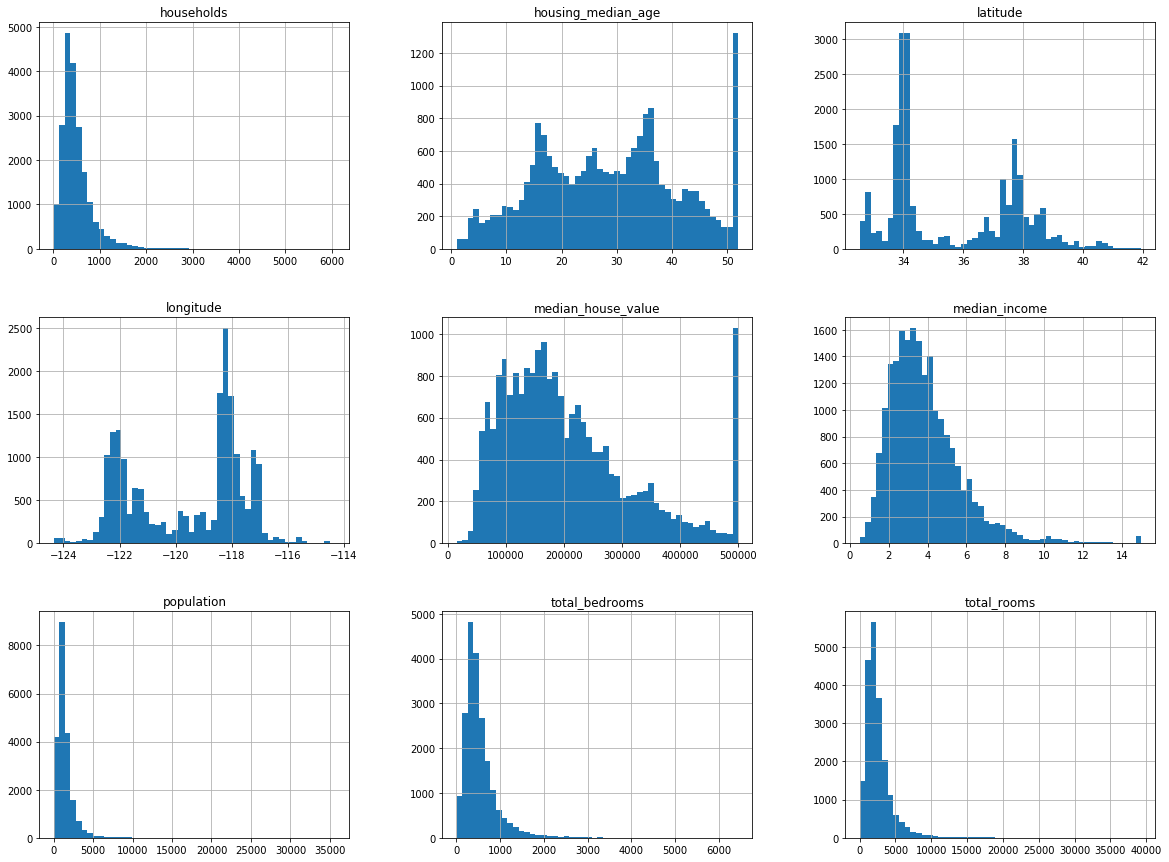

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [12]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set,test_set = split_train_test(housing,0.2)

In [14]:
print("train", len(train_set) , "test" , len(test_set))

('train', 16512, 'test', 4128)


In [15]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


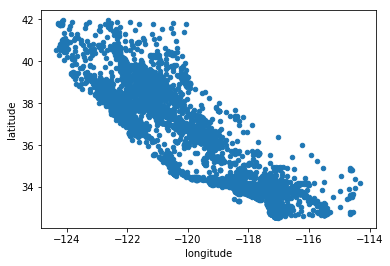

In [16]:
housing.plot(kind="scatter", x="longitude",y="latitude")

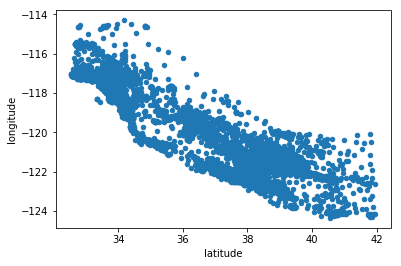

In [17]:
housing.plot(kind="scatter", x="latitude",y="longitude")

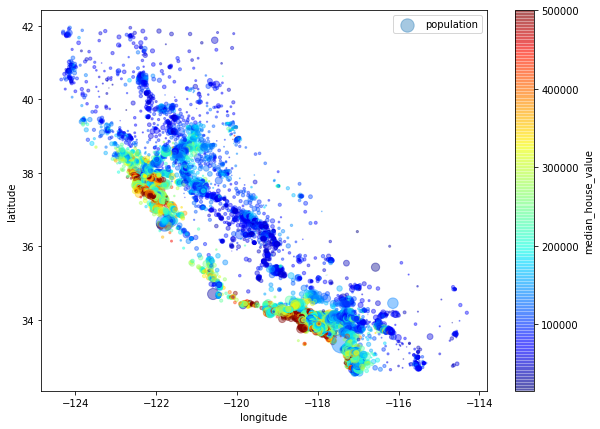

In [18]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100, label ="population",figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,)

In [19]:
corr_matrix = housing.corr()

In [20]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000142B5DD8>,
      dtype=object)

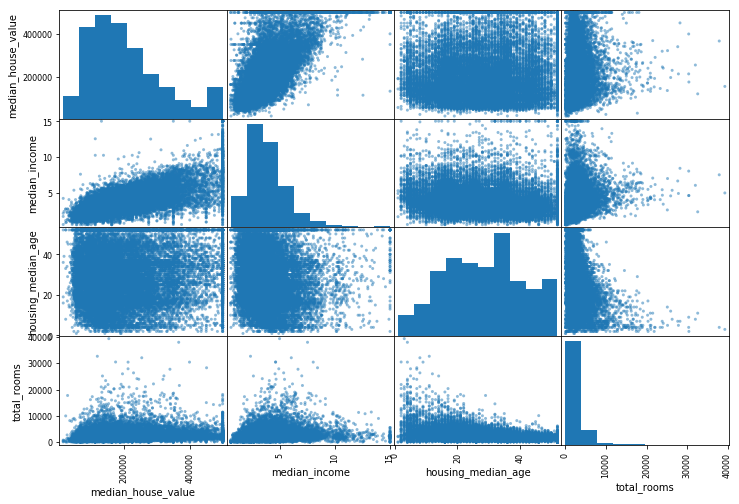

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","median_income","housing_median_age","total_rooms"]
scatter_matrix(housing[attributes],figsize=(12,8))

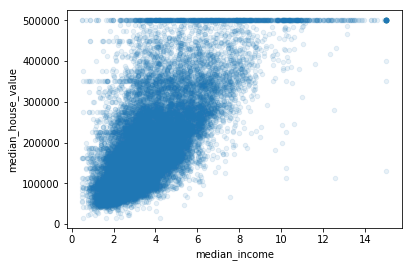

In [22]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

In [23]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [24]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [25]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [26]:
housing_NA_removed = housing.dropna(subset=["total_bedrooms"])
len(housing_NA_removed)

20433

In [27]:
len(housing)

20640

In [28]:
housing_remove_column = housing.drop("total_bedrooms",axis=1)

In [30]:
housing_remove_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
ocean_proximity             20640 non-null object
rooms_per_household         20640 non-null float64
bedrooms_per_room           20433 non-null float64
population_per_household    20640 non-null float64
dtypes: float64(11), object(1)
memory usage: 1.9+ MB


In [31]:
len(housing_remove_column)

20640

In [32]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median,inplace=True)

In [33]:
len(housing)

20640

In [34]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
ocean_proximity             20640 non-null object
rooms_per_household         20640 non-null float64
bedrooms_per_room           20433 non-null float64
population_per_household    20640 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [35]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")
# to use impter all column should be numeric as median value will ve placed on NA value to corresponding column
housing_without_text_column = housing.drop("ocean_proximity",axis=1)

c:\python27\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [36]:
imputer.fit(housing_without_text_column)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [37]:
housing_without_text_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
rooms_per_household         20640 non-null float64
bedrooms_per_room           20433 non-null float64
population_per_household    20640 non-null float64
dtypes: float64(12)
memory usage: 1.9 MB


In [38]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [40]:
# This will give median value of each column, notice this is equal to imputer statistics
housing_without_text_column.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [41]:
x=imputer.transform(housing_without_text_column)

In [42]:
housing_tr= pd.DataFrame(x, columns=housing_without_text_column.columns)

In [43]:
housing_tr.info()
# all columns have filled values now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
rooms_per_household         20640 non-null float64
bedrooms_per_room           20640 non-null float64
population_per_household    20640 non-null float64
dtypes: float64(12)
memory usage: 1.9 MB


In [44]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer(sparse_output = False)
housing_cat =housing["ocean_proximity"]
housing_one_hot = encoder.fit_transform(housing_cat)

In [45]:
housing_one_hot

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [46]:
housing_cat.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [47]:
# writing first transformer

from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix,population_ix, household_ix = 3,4,5,6
class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_household =  X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

In [48]:
attr_adder = CombinedAttributeAdder(add_bedrooms_per_room = False)
housing_extra_attr = attr_adder.transform(housing.values)
added_attr_col = list(housing.columns)
added_attr_col.append("rooms_per_household")
added_attr_col.append("population_per_household")
print(added_attr_col)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'rooms_per_household', 'population_per_household']


In [49]:
housing_extra_attr

array([[-122.23, 37.88, 41.0, ..., 2.5555555555555554, 6.984126984126984,
        2.5555555555555554],
       [-122.22, 37.86, 21.0, ..., 2.109841827768014, 6.238137082601054,
        2.109841827768014],
       [-122.24, 37.85, 52.0, ..., 2.8022598870056497, 8.288135593220339,
        2.8022598870056497],
       ...,
       [-121.22, 39.43, 17.0, ..., 2.325635103926097, 5.20554272517321,
        2.325635103926097],
       [-121.32, 39.43, 18.0, ..., 2.1232091690544412, 5.329512893982808,
        2.1232091690544412],
       [-121.24, 39.37, 16.0, ..., 2.616981132075472, 5.254716981132075,
        2.616981132075472]], dtype=object)

In [50]:
added_attr_housing = pd.DataFrame(data=housing_extra_attr,columns=added_attr_col)

In [51]:
added_attr_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY,6.98413,0.146591,2.55556,6.98413,2.55556
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,6.23814,0.155797,2.10984,6.23814,2.10984
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY,8.28814,0.129516,2.80226,8.28814,2.80226
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY,5.81735,0.184458,2.54795,5.81735,2.54795
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY,6.28185,0.172096,2.18147,6.28185,2.18147


In [52]:
# writing pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
housing_pipeline = Pipeline([('imputer', Imputer(strategy="median")),('attr_adder', CombinedAttributeAdder()),('std_scaler', StandardScaler()),])

c:\python27\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [54]:
#take fresh data again to add adder column and imputer implementation
housing= pd.read_csv("datasets/housing/housing_book_office.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [57]:
housing_without_ocean_proximity = housing.drop("ocean_proximity",axis=1)

In [58]:
housing_without_ocean_proximity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [60]:
# So the pipeline should fill absent value for total_bedrooms, add 3 more column from adder and do scaling, that too all in one go
housing_num_tr = housing_pipeline.fit_transform(housing_without_ocean_proximity)
col_names = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value","rooms_per_household","population_per_household","bedrooms_per_room"]

housing_piple_result = pd.DataFrame(data=housing_num_tr,columns=col_names)


In [61]:
housing_piple_result.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.628559,-0.049597,-1.029988
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.327041,-0.092512,-0.888897
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,1.155620,-0.025843,-1.291686
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.050329,-0.449613
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.085616,-0.639087


In [62]:
housing_piple_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
rooms_per_household         20640 non-null float64
population_per_household    20640 non-null float64
bedrooms_per_room           20640 non-null float64
dtypes: float64(12)
memory usage: 1.9 MB


In [64]:
list(housing_without_ocean_proximity)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [87]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector (BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.attribute_names].values
    

In [109]:

numeric_attributes = list(housing_without_ocean_proximity)
categorical_attributes = ["ocean_proximity"]

from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)
    
numeric_pipeline = Pipeline([
                    ('attribute_selector',DataFrameSelector(numeric_attributes)),
                    ('imputer', Imputer(strategy="median")),
                    ('attr_adder', CombinedAttributeAdder(add_bedrooms_per_room = False)),
                    ('std_scaler', StandardScaler()),
                    ])

categorical_pipeline = Pipeline([
    ('attribute_selector', DataFrameSelector(categorical_attributes)),
    ('label_binarizer', MyLabelBinarizer()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', numeric_pipeline),
    ('cat_pipeline', categorical_pipeline),
])

c:\python27\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [110]:
housing_prepared = full_pipeline.fit_transform(housing)

In [112]:

housing_prepared

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [120]:
without_ocean = housing.drop("ocean_proximity",axis=1)
full_attr_col = list(without_ocean)
full_attr_col = full_attr_col + ["rooms_per_household","population_per_household","1H OCEAN","INLAND","NEAR OCEAN","NEAR BAY","ISLAND"]

In [121]:
full_attr_col

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'rooms_per_household',
 'population_per_household',
 '1H OCEAN',
 'INLAND',
 'NEAR OCEAN',
 'NEAR BAY',
 'ISLAND']

In [122]:
housing_prepared_df = pd.DataFrame(data=housing_prepared,columns=full_attr_col)

In [123]:
housing_prepared_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.628559,-0.049597,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.327041,-0.092512,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,1.155620,-0.025843,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.050329,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.085616,0.0,0.0,0.0,1.0,0.0


In [124]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [142]:
from sklearn.linear_model import LinearRegression
housing_labels = housing["median_house_value"]

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_df,housing_labels)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [150]:
some_data = housing[50:55]
some_data_label = housing_labels[50:55]


some_data_prepared = full_pipeline.transform(some_data)
print("some data prediction : ", lin_reg.predict(some_data_prepared))

('some data prediction : ', array([171900.,  93800.,  97500., 104200.,  87500.]))


In [148]:
print(some_data_label)

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


In [149]:
# computing standard error

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared_df)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.4766611061638643e-10

In [152]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(housing_prepared_df,housing_labels)
print("some data prediction : ", lin_reg.predict(some_data_prepared))

('some data prediction : ', array([171900.,  93800.,  97500., 104200.,  87500.]))


In [153]:
print(some_data_label)

50    171900.0
51     93800.0
52     97500.0
53    104200.0
54     87500.0
Name: median_house_value, dtype: float64


In [154]:
from sklearn.metrics import mean_squared_error
housing_predictions = decision_tree.predict(housing_prepared_df)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [164]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(decision_tree,housing_prepared_df,housing_labels, scoring = "neg_mean_squared_error",cv=10)

In [165]:
tree_rmse_score = np.sqrt(-scores)

In [166]:
def display_score(score):
    print("Scores : ", score)
    print("Mean : ", score.mean())
    print("Standard deviation : ", score.std())
    
    

In [167]:
display_score(tree_rmse_score)

('Scores : ', array([ 75.51502751, 129.62378478,  99.50215465,  63.71873758,
       119.5112787 ,  68.80063322,  79.42379703,  67.87899631,
       115.40709878,  79.17941554]))
('Mean : ', 89.85609241038739)
('Standard deviation : ', 22.901477385222226)


In [170]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg,housing_prepared_df,housing_labels, scoring = "neg_mean_squared_error",cv=10)
lin_rmse_score = np.sqrt(-scores)
display_score(lin_rmse_score)

('Scores : ', array([1.55066567e-10, 1.46533686e-10, 1.64278976e-10, 2.05397442e-10,
       2.37113555e-10, 2.30880992e-10, 3.23229878e-10, 4.96923312e-10,
       2.11678037e-10, 3.10848354e-10]))
('Mean : ', 2.481950798109666e-10)
('Standard deviation : ', 1.0052808988661706e-10)
